
####Step 1. Follow along with the tutorial to gain an understanding of the process

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of number the image represents:

```
Label	Class
0	0
1	1
2	2
3	3
4	4
5	5
6	6
7	7
8	8
9	9
```

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:


#### Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [20]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Iterating and Visualizing the Dataset

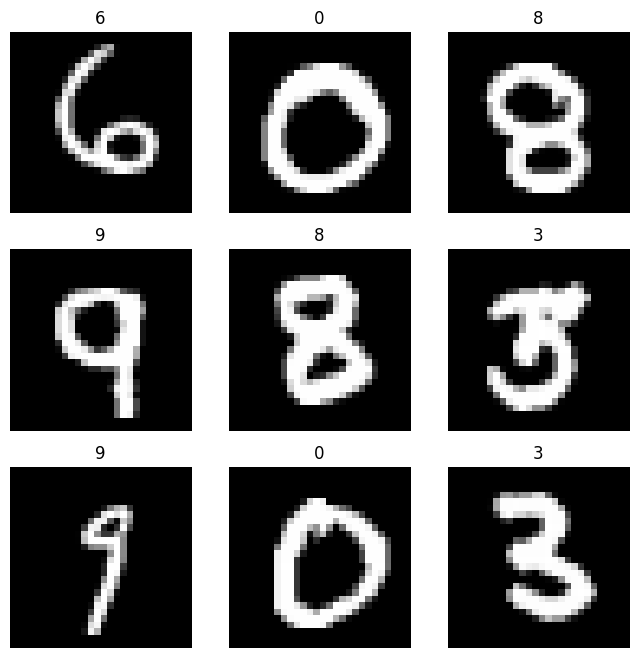

In [21]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

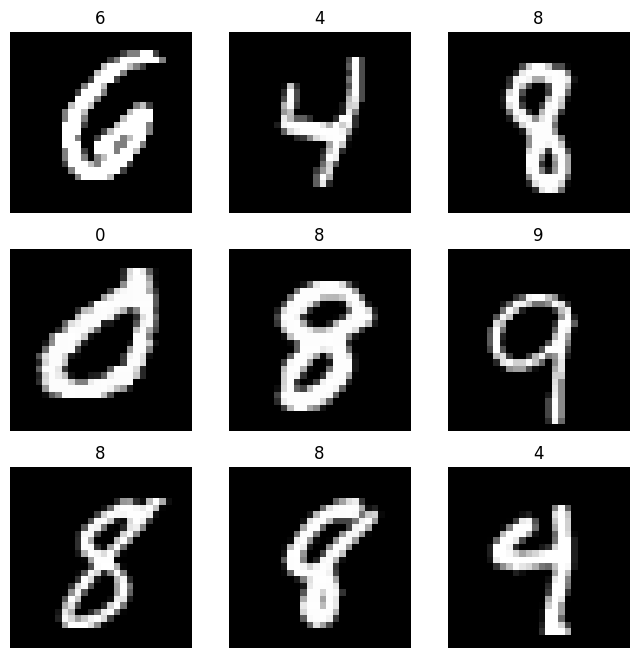

In [22]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [23]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [24]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()


        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    train_accuracy = 100 * correct_train / total_train
    print(f'Accuracy on the training set after epoch {epoch + 1}: {train_accuracy:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0647187918424605
Epoch 1, Batch 200, Loss: 0.4331596396863461
Epoch 1, Batch 300, Loss: 0.39586752831935884
Epoch 1, Batch 400, Loss: 0.3470181566476822
Epoch 1, Batch 500, Loss: 0.3282723379135132
Epoch 1, Batch 600, Loss: 0.3012372525036335
Epoch 1, Batch 700, Loss: 0.28048172511160374
Epoch 1, Batch 800, Loss: 0.2345068485289812
Epoch 1, Batch 900, Loss: 0.23875800766050814
Accuracy on the training set after epoch 1: 88.31%
Epoch 2, Batch 100, Loss: 0.22510195903480054
Epoch 2, Batch 200, Loss: 0.21359145153313874
Epoch 2, Batch 300, Loss: 0.19438791748136283
Epoch 2, Batch 400, Loss: 0.20368424601852894
Epoch 2, Batch 500, Loss: 0.1913504634425044
Epoch 2, Batch 600, Loss: 0.17522815708070993
Epoch 2, Batch 700, Loss: 0.1738713588565588
Epoch 2, Batch 800, Loss: 0.17476008828729392
Epoch 2, Batch 900, Loss: 0.16763769015669822
Accuracy on the training set after epoch 2: 94.23%
Epoch 3, Batch 100, Loss: 0.15171813625842334
Epoch 3, Batch 200, Loss: 0.1396

In [26]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { 100*correct / total:.2f}%')

Accuracy on test set: 95.66%


####**Step 3. Report on the results in terms of prediction accuracy on the train and test datasets**



The loss started at about 1.0647 in the first batch of the first epoch and consistently decreased across epochs, showing that the model is learning from the training data effectively.

The accuracy on the training set increased from 88.31% after the first epoch to 97.04% after the fifth epoch, indicating a strong learning capability of the model to generalize over the training dataset.

The model achieved an accuracy of 95.66% on the test set, which is quite high and suggests that the model generalizes well to new, unseen data.

In [10]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

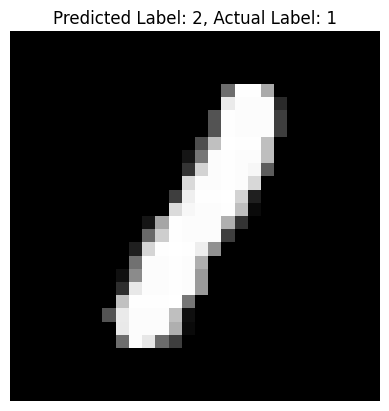

In [11]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

#### **Step 4. Choose one of the proposed modifications below:**

1. Add another Dense layer of 128 nodes

2. Increase the current number of nodes in the layer to 256

**Hypothesize how it would change the performance results**

Adding an additional dense layer of 128 nodes to the neural network model is likely to increase the model's capacity to learn from the training data, potentially capturing more complex patterns. This could lead to improved generalization on the test set, though it may also increase the risk of overfitting if not properly regulated with techniques such as dropout or more data.

In [27]:
class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Added another Dense layer of 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)    # This is the output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the modified neural network, loss function, and optimizer
model = ModifiedMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### **Step 5. Modify the model based on the chosen method and train**

In [28]:
# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    train_accuracy = 100 * correct_train / total_train
    print(f'Accuracy on the training set after epoch {epoch + 1}: {train_accuracy:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1518207344412803
Epoch 1, Batch 200, Loss: 0.4678224919736385
Epoch 1, Batch 300, Loss: 0.36411194890737536
Epoch 1, Batch 400, Loss: 0.3645415227115154
Epoch 1, Batch 500, Loss: 0.3122816780954599
Epoch 1, Batch 600, Loss: 0.28095533601939676
Epoch 1, Batch 700, Loss: 0.26217990785837175
Epoch 1, Batch 800, Loss: 0.25731197811663153
Epoch 1, Batch 900, Loss: 0.2311330410093069
Accuracy on the training set after epoch 1: 87.44%
Epoch 2, Batch 100, Loss: 0.2064758674427867
Epoch 2, Batch 200, Loss: 0.1925704189389944
Epoch 2, Batch 300, Loss: 0.182893435806036
Epoch 2, Batch 400, Loss: 0.19951093584299087
Epoch 2, Batch 500, Loss: 0.1947770408913493
Epoch 2, Batch 600, Loss: 0.15584499422460796
Epoch 2, Batch 700, Loss: 0.18260477535426617
Epoch 2, Batch 800, Loss: 0.17516744967550038
Epoch 2, Batch 900, Loss: 0.16811372108757497
Accuracy on the training set after epoch 2: 94.31%
Epoch 3, Batch 100, Loss: 0.1321078266762197
Epoch 3, Batch 200, Loss: 0.1412221

In [30]:
# Evaluate the modified model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set with modified model: {accuracy:.2f}%')

Accuracy on test set with modified model: 96.56%


#### **Step 6. Report on the results of the modified model and if it matches your hypothesis**

The results of the modified model, which included an additional dense layer of 128 nodes, showed an improvement in test set accuracy from 95.66% to 96.56%. This indicates that the model's ability to generalize to unseen data was enhanced by the modification. The training set accuracy slightly decreased from 97.04% to 96.93%, which is a minimal change, suggesting that the added complexity did not significantly hinder the model's performance on the training data.

These results match the initial hypothesis that adding an additional dense layer could improve the model's capacity to capture more complex patterns, potentially leading to better generalization on the test set. The observed increase in test accuracy confirms this hypothesis, demonstrating that the additional layer contributed positively to the model's performance, without causing a notable overfitting issue as indicated by the relatively stable training accuracy.

#### Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [32]:
class ExperimentMLP(nn.Module):
    def __init__(self):
        super(ExperimentMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 10)
        # Note: No batch normalization before the output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.nn.functional.leaky_relu(self.bn1(self.fc1(x)))
        x = torch.nn.functional.leaky_relu(self.bn2(self.fc2(x)))
        x = torch.nn.functional.leaky_relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Initialize the advanced neural network
model = ExperimentMLP()

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)


In [33]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0
    scheduler.step()  # Update the learning rate

    train_accuracy = 100 * correct_train / total_train
    print(f'Accuracy on the training set after epoch {epoch + 1}: {train_accuracy:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.8169256579875946
Epoch 1, Batch 200, Loss: 0.3075244626402855
Epoch 1, Batch 300, Loss: 0.2289151883870363
Epoch 1, Batch 400, Loss: 0.17695816826075317
Epoch 1, Batch 500, Loss: 0.1840629857033491
Epoch 1, Batch 600, Loss: 0.15942009396851062
Epoch 1, Batch 700, Loss: 0.14891530893743038
Epoch 1, Batch 800, Loss: 0.13789904031902553
Epoch 1, Batch 900, Loss: 0.12952329283580183
Accuracy on the training set after epoch 1: 93.55%
Epoch 2, Batch 100, Loss: 0.09563201582990587
Epoch 2, Batch 200, Loss: 0.0935482428688556
Epoch 2, Batch 300, Loss: 0.08770967199467122
Epoch 2, Batch 400, Loss: 0.09892081341706216
Epoch 2, Batch 500, Loss: 0.10311991262249648
Epoch 2, Batch 600, Loss: 0.07921625660732388
Epoch 2, Batch 700, Loss: 0.0913521798606962
Epoch 2, Batch 800, Loss: 0.0885857748799026
Epoch 2, Batch 900, Loss: 0.09723982211202382
Accuracy on the training set after epoch 2: 97.21%
Epoch 3, Batch 100, Loss: 0.05827454072423279
Epoch 3, Batch 200, Loss: 0.063

In [34]:
# Evaluate the modified model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set with modified model: {accuracy:.2f}%')

Accuracy on test set with modified model: 97.58%


The ExperimentMLP model introduced batch normalization and Leaky ReLU activation functions, along with an Adam optimizer and a learning rate scheduler, significantly enhancing the model's performance. Training accuracy improved steadily, reaching 98.74% by the fifth epoch, while test accuracy increased to 97.58%. These modifications, particularly batch normalization and Leaky ReLU, contributed to more effective learning and better generalization to unseen data, demonstrating the impact of carefully chosen hyperparameters and architectural adjustments on neural network performance.